# 1. Oscillation time and damping coefficients  in a nonlinear pendulum

We consider a nonlinear pendulum modeled by 
$$
\frac{d^2x}{dt^2} + 2\,\alpha  \frac{dx}{dt} + \beta\, \frac{dx}{dt}\, \left| \frac{dx}{dt} \right|  + x\, \left(1-t_{n+1} = t_n \gamma\,x^2\right)=0, 
\qquad x(0) = x_0, \dot{x}(0) = 0.
$$
Denote by  $\tau(x_0, \alpha, \beta)$ the time taking by the pendulum to complete one oscillation starting at $x_0$ with vanishing velocity. Fixed $x_0$, this notebook explores the dependence of $\tau$ on the damping coefficients $\alpha$ and $\beta$. The effect of an additional parameter  $\gamma$ is also considered 

In [1]:
#import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import *

In [2]:
#from scipy.integrate import ode
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [3]:
tau_l = lambda a : 2*np.pi/np.sqrt(1-a**2)

In [4]:
def pend(x,t,a,b,c=1):
    return [x[1], -2*x[1]*a - b*x[1]*np.abs(x[1]) - x[0]*(1-c*x[0]**2)] 

Numerical approximation on the interval $[0, tm]$ of the   nonlinear pendulum equation starting at $x_0$ with vanishing velocity.  

In [6]:
def sol(x0,tm, a,b,c):
    xinit = [x0,0.0]
    tt = [0.0, tm]
    return odeint(pend, xinit,tt, args=(a, b, c))[1]    

The function tau approximates the second zero of the $x'(t)$ on for $t>0$. The approximation is done via Newthon's method with a starting value tm:
$$
t_{n+1} = t_n - \frac{x'(t_n)}{x''(t_n)}
$$

In [20]:
def tau(x0, tau_init, a,b, c): 
    t = tau_init
    i, niter = 0, 10
    while (i < niter):
        S = sol(x0,t, a,b,c) 
        t= t-S[1]/pend(S,t, a, b, c)[1]
        i = i+1
    return t

## 1. Checking  

In [127]:
x0, a, b, c  = 0.2, -0.3, 0.0, -1
tm0 = tau_l(a)
tm = tau(x0, tm0, a,b, c)
xinit = [x0,0.0]
tvalues =  np.linspace(0, tm, 100)
trayectory = odeint(pend, xinit,tvalues, args=(a, b, c)) 
zero_level= np.zeros(len(tvalues))
print(sol(x0,a,b,c,tm)[1], tm)

0.04575888425421981 5.752644075584112


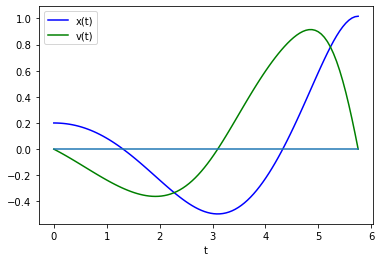

In [128]:
plt.plot(tvalues, trayectory[:, 0], 'b', label='x(t)')
plt.plot(tvalues, trayectory[:, 1], 'g', label='v(t)')
plt.plot(tvalues, zero_level)
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

## 2. Continuation numerical procedure 

In [118]:
npts= 100
alpha_max = 0.15
alpha_plus = np.linspace(0.0, alpha_max, npts) 
alpha_minus = -alpha_plus
linear_plus = tau_l(alpha_plus)
linear_minus = tau_l(alpha_minus)

In [119]:
ot0_plus, ot0_minus = np.zeros(npts), np.zeros(npts)

In [120]:
x0, b   = 0.2, 0.0 
tm = 2*np.pi
for ii in range(npts):
    tm = tau(x0, tm, alpha_minus[ii],b, -1)
    ot0_minus[ii] = tm

In [121]:
tp = 2*np.pi
for ii in range(npts):
    tp= tau(x0, tp, alpha_plus[ii],b, -1)
    ot0_plus[ii] = tp

In [122]:
ot1_plus, ot1_minus = np.zeros(npts), np.zeros(npts)

In [123]:
x0, b   = 0.2, 0.0 

In [124]:
tm = 2*np.pi
for ii in range(npts):
    tm = tau(x0, tm, alpha_minus[ii],b, 1)
    ot1_minus[ii] = tm

In [125]:
for ii in range(npts):
    tp= tau(x0, tp, alpha_plus[ii],b, 1)
    ot1_plus[ii] = tp

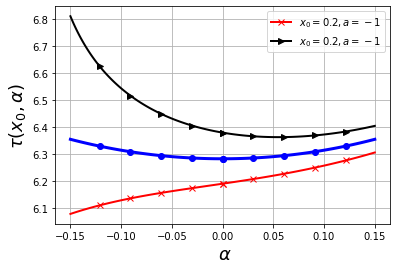

In [134]:
plt.plot(alpha_plus,linear_plus, color='blue', linewidth = 3, marker = "o",markevery=20, )
plt.plot(alpha_minus,linear_minus, color='blue', linewidth = 3, marker = "o",markevery=20, )
plt.plot(alpha_minus,ot0_minus, color='red', linewidth = 2, marker = "x",markevery=20)
plt.plot(alpha_plus,ot0_plus, color='red', linewidth = 2, marker = "x",markevery=20, \
         label= f'$x_0 = {x0}, a = {c}$' )
plt.plot(alpha_minus,ot1_minus, color='black', linewidth = 2, marker = ">",markevery=20)
plt.plot(alpha_plus,ot1_plus, color='black', linewidth = 2, marker = ">",markevery=20, \
         label= f'$x_0 = {x0}, a = {c}$' )
#plt.xticks([0,  0.05, 0.10, 0.15, 0.2, 0.3], [r'$0$', r'$0.05$', r'$0.1$',r'$0.15$', r'$0.2$' , r'$0.3$'],fontsize=12)
#plt.yticks([17*np.pi/10, 18*np.pi/10, 19*np.pi/10,2*np.pi,   21*np.pi/10, 22*np.pi/10, 23*np.pi/10], [r'$17\pi/10$',r'$18\pi/10$',r'$19\pi/10$',r'$2\pi$', r'$21\pi/10$',r'$22\pi/10$', r'$23\pi/10$'],fontsize=16)
plt.xlabel(r' $\alpha$', fontsize=18)
plt.ylabel(r'$ \tau(x_0,\alpha)$',fontsize=18)
plt.grid(True)
plt.legend(loc='best')
plt.savefig('oscillation_time_comp.png')
plt.show()